In [1]:
import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.neighbors import KernelDensity
from sklearn import metrics

import seaborn as sns  
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# leb_df = pd.read_csv('../pro-test/data/leb_cleand.csv')
full_df = pd.read_csv('../pro-test/data/full_df.csv')

In [3]:
full_df.shape

(13387, 38)

In [4]:
full_df['sizeexact'] = full_df['sizeexact'].fillna(0)
full_df['sizeestimate'] = full_df['sizeestimate'].fillna(0)
full_df['combined_sizes'] = full_df['sizeexact'] + full_df['sizeestimate']
full_df.drop(columns=['sizeexact','sizeestimate'], inplace=True)

In [5]:
full_df.shape

(13387, 37)

In [6]:
mean_size_imputer = SimpleImputer(missing_values=-99,strategy="mean")
full_df['combined_sizes'] = mean_size_imputer.fit_transform(full_df[['combined_sizes']])

In [7]:
full_df.columns

Index(['startdate', 'governorate', 'district', 'gpslatend', 'gpslongend',
       'locationtypeend', 'demandtypeone', 'demandtypetwo', 'orgtypefirst',
       'tacticprimary', 'tacticsecondary', 'violence', 'propertydamage',
       'repression', 'teargas', 'rubberbullets', 'liveammo', 'sticks',
       'surround', 'dogs', 'cleararea', 'policerepress', 'milrepress',
       'beltegeyyarepress', 'militiarepress', 'partyrepress',
       'employerrepress', 'otherrepress', 'killed', 'injured', 'arrested',
       'country', 'target', 'MBproperty', 'residentsrepress', 'MBrepress',
       'combined_sizes'],
      dtype='object')

In [8]:
# combined_sizes = full_df[['combined_sizes']]

In [9]:
data = full_df.drop(columns=['orgtypefirst','startdate','gpslatend','gpslongend','district','demandtypetwo','tacticsecondary','propertydamage',
       'teargas', 'rubberbullets', 'liveammo', 'sticks',
       'surround', 'dogs', 'cleararea', 'policerepress', 'milrepress',
       'militiarepress', 'partyrepress', 'employerrepress','target',
       'otherrepress', 'killed', 'injured', 'arrested','beltegeyyarepress','MBrepress','MBproperty','residentsrepress'])

In [10]:
data.dropna(inplace=True)

In [11]:
binary_data = data.copy()

In [12]:
binary_data['binary_target'] = np.where(binary_data['repression']!= 'No known coercion, no security presence', 1, 0)

In [13]:
binary_data.binary_target.value_counts()

0    10580
1     2800
Name: binary_target, dtype: int64

In [14]:
X = data.drop(columns='repression')
y = data[['repression']]

In [15]:
ohe = OneHotEncoder()
X = ohe.fit_transform(X)

In [16]:
X = X.toarray()

In [17]:
oen = OrdinalEncoder()
y = oen.fit_transform(y)

In [18]:
# y = pd.get_dummies(full_df['repression'])
# y.columns = y.columns.str.replace(' ', '_')
# y.columns = y.columns.str.replace('/', '')
# y.columns = y.columns.str.replace(',', '')

In [19]:
# data = pd.concat([X,y],axis=1)
# data.columns

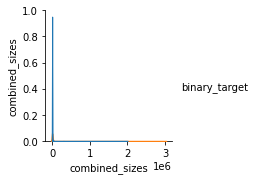

In [20]:
sns.pairplot(binary_data.drop(columns='repression'), hue='binary_target')

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [22]:
kde = KernelDensity(kernel='tophat', bandwidth=0.001)
kde.fit(X_train)
kde.score_samples(X_train)

array([2735.86844669, 2736.56159387, 2740.60464514, ..., 2738.57649689,
       2735.86844669, 2735.86844669])

In [23]:
kde.score(X_test, y_test)

-inf

/tmp/ipykernel_4744/3684463037.py:1: RuntimeWarning: overflow encountered in exp
  plt.plot(X_train, np.exp(kde.score_samples(X_train)))


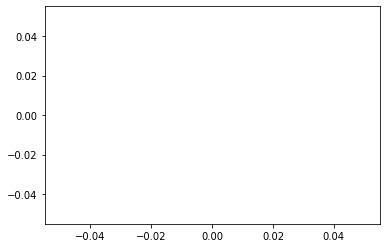

In [24]:
plt.plot(X_train, np.exp(kde.score_samples(X_train)))
plt.show()

In [25]:
X_binary = binary_data.drop(columns='repression')

In [26]:
y_binary = binary_data[['binary_target']]

In [27]:
X_binary = ohe.fit_transform(X_binary)
X_binary = X_binary.toarray()

In [28]:
Xb_train, Xb_test, yb_train, yb_test = train_test_split(X_binary, y_binary, test_size=0.33, random_state=42)

In [29]:
kde.fit(Xb_train)
kde.score_samples(Xb_train)

array([2753.64213793, 2754.33528511, 2758.28652883, ..., 2754.74075022,
       2753.64213793, 2753.64213793])

/tmp/ipykernel_4744/1209682924.py:1: RuntimeWarning: overflow encountered in exp
  plt.plot(Xb_train, np.exp(kde.score_samples(Xb_train)))


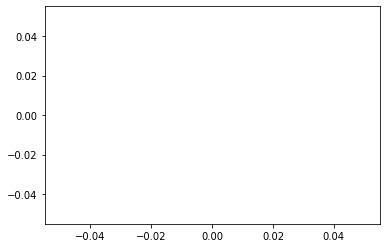

In [30]:
plt.plot(Xb_train, np.exp(kde.score_samples(Xb_train)))
plt.show()

In [31]:
clf = DecisionTreeClassifier(random_state=2)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2, splitter='best')

In [32]:
clf.score(X_test, y_test)

0.765625

In [33]:
# X_test_new = pd.DataFrame({'governorate':['Baghdad'], 'locationtypeend':['Midan'], 'demandtypeone':['Politics (national)'],
#                            'tacticprimary':['Demonstration / protest'],'violence':['Riot'],'country':['Iraq']})
# X_test_new

In [34]:
score_baseline = cross_val_score(clf,
                                 X_test, y_test,
                                 cv=10)
score_baseline

/home/kevinlee7007/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/model_selection/_split.py:665: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


array([0.760181  , 0.71719457, 0.77149321, 0.73529412, 0.75339367,
       0.74208145, 0.76417234, 0.74829932, 0.75963719, 0.7755102 ])

In [35]:
score_baseline.mean()

0.7527257056668821

In [36]:
y_pred = clf.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.765625